# Juliaではじめる会計でーたさいえんす　第1回
Juliaは、まだまだライブラリの充実度などで課題があるものの、プログラミング言語としてはPythonやRよりも優れていると思います。特に、forループを使うような作業などについて、Juliaはインタープリタ型言語のPythonやRよりも圧倒的に早いです。一方、C言語などよりも習得は容易であり、使い勝手はPythonやRに近いです。両者のイイトコドリをした言語と言えましょう。もっとシステマティックにJuliaを勉強されたい方は、"進藤&佐藤(2020)『1から始める Juliaプログラミング』コロナ社"が現時点では日本語書籍の中でベストだと思います。

本稿は、新井康平先生のRのコード( https://twitter.com/araikohei_osaka/status/1257917790708576256?s=20 )を元に書かれたものです。元の『企業会計』7月号の「Pythonではじめる会計データサイエンス」(第1回)については、私が海外にいるため、参照できておりません。（電子版を購読しましたが、7月までアップされないそうです。）この点、ご諒承下さい。

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#財務会計篇" data-toc-modified-id="財務会計篇-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>財務会計篇</a></span><ul class="toc-item"><li><span><a href="#パッケージの読込" data-toc-modified-id="パッケージの読込-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>パッケージの読込</a></span></li><li><span><a href="#データ準備" data-toc-modified-id="データ準備-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>データ準備</a></span></li><li><span><a href="#散布図" data-toc-modified-id="散布図-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>散布図</a></span></li><li><span><a href="#線形確率モデル(LPM)" data-toc-modified-id="線形確率モデル(LPM)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>線形確率モデル(LPM)</a></span></li><li><span><a href="#グラフに線形回帰直線を追加" data-toc-modified-id="グラフに線形回帰直線を追加-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>グラフに線形回帰直線を追加</a></span></li><li><span><a href="#Logit-Model-ロジスティック回帰" data-toc-modified-id="Logit-Model-ロジスティック回帰-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Logit Model ロジスティック回帰</a></span></li><li><span><a href="#おまけ:-Bounded-Linear-Probability-Model" data-toc-modified-id="おまけ:-Bounded-Linear-Probability-Model-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>おまけ: Bounded Linear Probability Model</a></span></li></ul></li><li><span><a href="#管理会計篇" data-toc-modified-id="管理会計篇-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>管理会計篇</a></span><ul class="toc-item"><li><span><a href="#パッケージの読込" data-toc-modified-id="パッケージの読込-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>パッケージの読込</a></span></li><li><span><a href="#シミュレーション関数の作成" data-toc-modified-id="シミュレーション関数の作成-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>シミュレーション関数の作成</a></span></li><li><span><a href="#パラメータの設定" data-toc-modified-id="パラメータの設定-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>パラメータの設定</a></span></li><li><span><a href="#実行" data-toc-modified-id="実行-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>実行</a></span></li><li><span><a href="#シミュレーションの結果の表示" data-toc-modified-id="シミュレーションの結果の表示-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>シミュレーションの結果の表示</a></span><ul class="toc-item"><li><span><a href="#記述統計量" data-toc-modified-id="記述統計量-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>記述統計量</a></span></li><li><span><a href="#現在価値が800以上の割合" data-toc-modified-id="現在価値が800以上の割合-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>現在価値が800以上の割合</a></span></li><li><span><a href="#シミュレーションした現在価値の分布のグラフ" data-toc-modified-id="シミュレーションした現在価値の分布のグラフ-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>シミュレーションした現在価値の分布のグラフ</a></span></li></ul></li></ul></li></ul></div>

## 財務会計篇
### パッケージの読込
まだ各パッケージをインストールしていない場合は、Julia上で次のコードを実行して下さい。

    using Pkg
    Pkg.add("DataFrames")
    Pkg.add("Plots")
    Pkg.add("GLM")

注：パッケージの初回読込時はJuliaの仕様上(プリコンパイル)、時間がかかります。

In [1]:
using DataFrames, Plots, GLM

### データ準備
このケースであれば、次のような書き方がシンプルでしょう。Juliaでは特別な設定をすることなく、日本語が自由に使えます。これは便利。

In [2]:
df = DataFrame(倒産ダミー変数 = vcat([ones(7), zeros(7)]...),
               負債比率 = [1.93, 0.99, 1.05, 0.90, 0.88, 0.69, 0.59, 0.40, 0.62, 0.56, 0.26, 0.55, 0.72, 0.67])

,倒産ダミー変数,負債比率
,Float64,Float64
1,1.0,1.93
2,1.0,0.99
3,1.0,1.05
4,1.0,0.9
5,1.0,0.88
6,1.0,0.69
7,1.0,0.59
8,0.0,0.4
9,0.0,0.62


データを行列として捉えたい場合は、次のように書くこともできます。
通常は直接打つことなく、csvファイルとかから読み込むので、どっちもあまり使わないと思いますけど… 一点だけ要注意なのは、多次元配列に関して「行」指向（row-major order）なPythonやRと違って、Juliaは「列」指向（column-major order）です。線形代数を使って計量経済学を学ばれた方にとってはJuliaの方が自然かもしれません。

In [3]:
c1 = vcat(fill.([1,0], [7,7])...)  # 7*1 vector
c2 = [1.93, 0.99, 1.05, 0.90, 0.88, 0.69, 0.59, 0.40, 0.62, 0.56, 0.26, 0.55, 0.72, 0.67] # 7*1 vector
df_matrix = [c1 c2] # 7*2 matrix
df = DataFrame(df_matrix, [:倒産ダミー変数, :負債比率])

,倒産ダミー変数,負債比率
,Float64,Float64
1,1.0,1.93
2,1.0,0.99
3,1.0,1.05
4,1.0,0.9
5,1.0,0.88
6,1.0,0.69
7,1.0,0.59
8,0.0,0.4
9,0.0,0.62


### 散布図
特に難しいところはありませんが、一点だけ。ラベルを日本語で表示するには、フォントを日本語のものに変える必要があります。下記のfontfamilyの設定はMac用のものです。Windows用は、こちらhttps://willcloud.jp/knowhow/font-family/#font-family-4 をご参照下さい。

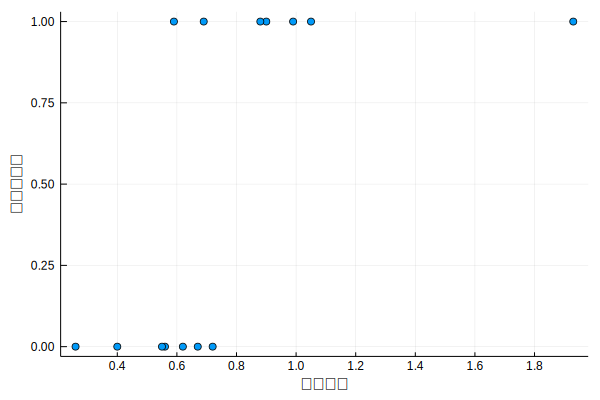

In [4]:
scatter(df.負債比率, df.倒産ダミー変数, leg = false, xlabel = "負債比率", ylabel = "倒産の有無", fontfamily="Hiragino Sans")

### 線形確率モデル(LPM)

In [5]:
# 線形回帰
model_lpm = lm(@formula(倒産ダミー変数 ~ 負債比率), df) # @formulaをつけ忘れないように。

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

倒産ダミー変数 ~ 1 + 負債比率

Coefficients:
─────────────────────────────────────────────────────────────────────────────
              Estimate  Std. Error    t value  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.107726    0.2582    -0.417218    0.6839  -0.670296   0.454844
負債比率          0.787064    0.299408   2.62873     0.0220   0.134709   1.43942
─────────────────────────────────────────────────────────────────────────────

In [6]:
# 決定係数
r²(model_lpm) # r2(...) も可
adjr²(model_lpm) # 調整済の方。この場合、特に「調整」する意義はあまりありませんが、念のためコードを掲載。

0.31254101092432995

### グラフに線形回帰直線を追加
上記で推定されたモデルを使って予測値を出す時ですが、「predict(model_lpm, x)」ではなく、「predict(model_lpm, [ones(201) x])」とする必要があります。ここでは、切片つきのモデルなので、係数bは[b1 b2]'という 2 * 1 のベクトルであり、201 * 1 のベクトルであるxのみだと、[b1 b2]'にかけること(xbの計算)ができません。X=[ones(201) x]なら、201 * 2 なので、Xb が(201 * 2)と(2 * 1)の行列の掛け算となり、辻褄があいます。

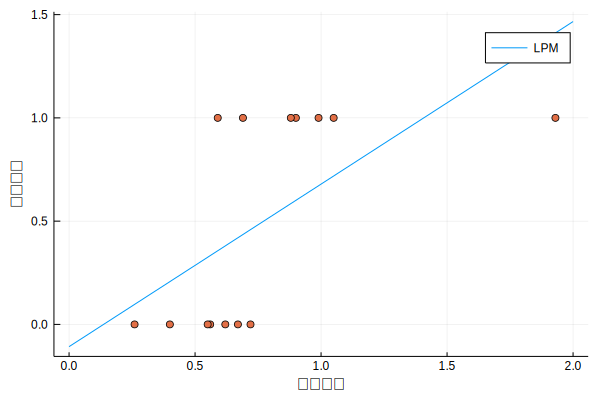

In [7]:
x = range(0, 2, length = 201) # 0 ~ 2 の範囲で数値を201個、等間隔で生成
plot(x, predict(model_lpm, [ones(201) x]), label = "LPM", xlabel = "負債比率", ylabel = "倒産確率", fontfamily="Hiragino Sans")
scatter!(df.負債比率, df.倒産ダミー変数, label = false) # !を忘れないこと

### Logit Model ロジスティック回帰

In [8]:
model_logit = glm(@formula(倒産ダミー変数 ~ 負債比率), df, Binomial())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

倒産ダミー変数 ~ 1 + 負債比率

Coefficients:
───────────────────────────────────────────────────────────────────────────
             Estimate  Std. Error   z value  Pr(>|z|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  -9.63661     5.48692  -1.75629    0.0790  -20.3908     1.11755
負債比率         13.8113      8.08604   1.70805    0.0876   -2.03702   29.6597
───────────────────────────────────────────────────────────────────────────

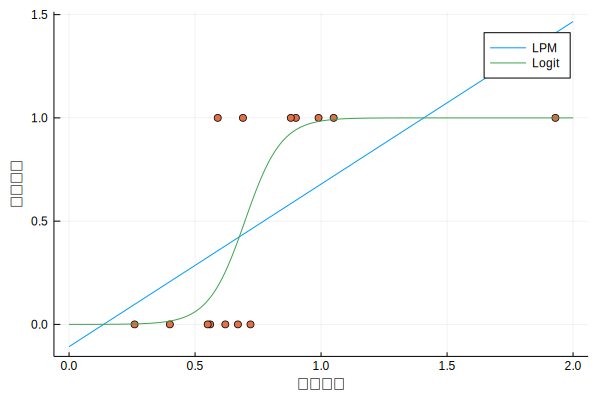

In [9]:
## グラフで確認
plot!(x, predict(model_logit, [ones(201) x]), label = "Logit")

### おまけ: Bounded Linear Probability Model
二点ほどご注意いただきたいことがあります。まず、下記で作った関数bounded_LPM(x)は、数値（スカラー）を入れる場合はそのままbounded_LPM(0.85)などとして問題ありませんが、列ベクトル$[0,0.01,0.02,...,2]'$を入れる場合には、ベクトルそのものではなく、ベクトルの各要素に対する演算を実行したいので、「bounded_LPM.(x)」のように、間にドットを入れる必要があります（入れなければエラーとなります）。また、Juliaでは1*1の行列（ベクトル）とスカラーは区別されます。"predict(model_lpm, [1 x])"だけでは行列（ベクトル）になってしまい、スカラーの0や1と比較できないので、そこから要素を取り出し（predict(model_lpm, [1 x])[1]）、スカラー化する必要があります。

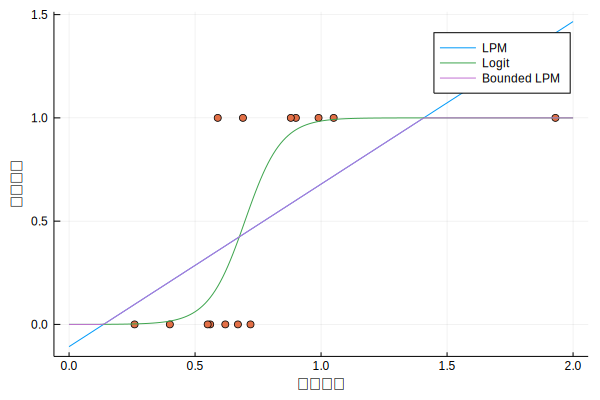

In [10]:
bounded_LPM(x) = max(min(predict(model_lpm, [1 x])[1], 1), 0)
plot!(x, bounded_LPM.(x), label = "Bounded LPM")

上記のような関数の書き方が嫌いな方は次のように書いても出力結果は同じです。

    function bounded_LPM(x)
        y = predict(model_lpm, [1 x])[1]
        if y > 1
            1
        elseif y < 0
            0
        else
            y
        end
    end

## 管理会計篇

### パッケージの読込
財務会計篇にて読み込んだパッケージに加えて、下記のパッケージを読み込みます。エラーが出たら、財務会計篇で記した手順に従ってインストールしてみて下さい。

In [11]:
using Random, Distributions

### シミュレーション関数の作成
ループを伴う操作の場合、Juliaではその仕様上、一旦関数化してから動かした方が早く動きます。ここでは、一旦シミュレーションの内容を関数化してから、CF期間などパラメータを設定して動かす、という方針をとります。このケースだと、CFの分布はi.i.d.(独立同分布)なので、Juliaの場合、 「シミュレーション数」 * 「年数」のCFの行列（各要素は対数正規分布に従ってランダムに生成）を作ってから、これに「年数」 * 1 の割引係数(discount factor)のベクトルをかける、という方が若干効率的で、プログラムもシンプルです。従って、まずはこの方法(PV_simulation関数)を示しますが、その次に『企業会計』「Pythonではじめる会計データサイエンス」に近いコード(PV_simulation_alt関数)も示してありますので、ご安心下さい。

In [12]:
function PV_simulation(year, sigma, mu, r, N, seed = 0)
    Random.seed!(seed)                           # 乱数固定
    dis_fac = [exp(-r*y) for y = 0:(year-1)]     # 割引係数ベクトル
    d = LogNormal(mu, sigma)                     # 分布の指定：今回は対数正規分布
    CF = rand(d, (N, year)) .* 100               # N(シミュレーション数)*year(年数)のCFの行列を生成
    CF * dis_fac                                 # NPVを返す(return)
end

PV_simulation (generic function with 2 methods)

In [13]:
function PV_simulation_alt(year, sigma, mu, r, N, seed = 0)
    Random.seed!(seed)
    dis_fac = [exp(-r*y) for y = 0:(year-1)]
    PV = zeros(N) # 要素が全て0のN(シミュレーション数)*1のNPVベクトル
    d = LogNormal(mu, sigma)
    for i = 1:year
        CF_temp = rand(d, N) .* 100
        PV += CF_temp .* dis_fac[i]
    end
    PV # PVを返す(return)
end

PV_simulation_alt (generic function with 2 methods)

### パラメータの設定
シミュレーション数、元ネタは10,000ですが、Juliaは速いので、200,000,000としています。Rでやったら、私の環境で2分以上かかりましたが、Juliaではどうでしょうか。下記に結果を示してあります。

In [14]:
year    = 10         # CFの発現期間
sigma   = 0.3        # 対数正規分布の標準偏差
mu      = -0.045     # 対数正規分布の平均
r       = 0.0        # 割引率
N       = 200000000  # シミュレーション数

200000000

### 実行
比較のため、ここでは実行速度を計測しています。Juliaでは非常に簡単で、冒頭に「@time」を入れるだけで測定ができます。for ループを避けたNPV_simulation関数の方がパフォーマンスがよいですね。同じ出力結果でも、どうコードを書くかでパフォーマンスが異なる、ということが現れていると思います。そして、どちらのコードであっても、Rの2分以上よりは圧倒的に速い点にご注目下さい。

In [15]:
@time PV = PV_simulation(year, sigma, mu, r, N)

 43.649760 seconds (579.15 k allocations: 31.320 GiB, 0.10% gc time)


200000000-element Array{Float64,1}:
  928.0737736930625
  999.5020029613422
 1051.3449861190484
 1058.6249972144353
 1084.4841248762446
 1082.2081636107087
 1050.9662581959376
  896.0322589025129
  809.9133293032205
 1332.2804864056197
 1101.431382959869
 1080.4984775605487
  893.3894553826036
    ⋮
  921.535281044947
  917.3882146449916
  885.5124143778005
 1101.0161292456532
 1063.2294720723435
 1153.4058113512299
  990.1438295200918
 1104.7762930082908
  944.1594561956631
  840.8288823501018
 1017.6644943407446
  788.9684702693608

In [16]:
@time PV_alt = PV_simulation_alt(year, sigma, mu, r, N)

 57.219647 seconds (376.23 k allocations: 61.113 GiB, 6.03% gc time)


200000000-element Array{Float64,1}:
  928.0737736930625
  999.5020029613423
 1051.3449861190484
 1058.6249972144353
 1084.4841248762446
 1082.2081636107087
 1050.9662581959376
  896.0322589025129
  809.9133293032205
 1332.2804864056197
 1101.4313829598693
 1080.4984775605487
  893.3894553826035
    ⋮
  921.535281044947
  917.3882146449918
  885.5124143778005
 1101.016129245653
 1063.2294720723432
 1153.40581135123
  990.1438295200918
 1104.7762930082908
  944.1594561956632
  840.8288823501017
 1017.6644943407445
  788.9684702693608

### シミュレーションの結果の表示
当然ですが、どちらの関数も結果としては同じことをやっているので、同様の結果になりますね。

#### 記述統計量

In [17]:
describe(PV)

Summary Stats:
Length:         200000000
Missing Count:  0
Mean:           1000.006478
Minimum:        568.768419
1st Quartile:   932.393631
Median:         995.209933
3rd Quartile:   1062.378983
Maximum:        1719.347244
Type:           Float64


In [18]:
describe(PV_alt)

Summary Stats:
Length:         200000000
Missing Count:  0
Mean:           1000.006478
Minimum:        568.768419
1st Quartile:   932.393631
Median:         995.209933
3rd Quartile:   1062.378983
Maximum:        1719.347244
Type:           Float64


#### 現在価値が800以上の割合

In [19]:
sum(PV .> 800) / size(PV)[1]

0.98813628

In [20]:
sum(PV_alt .> 800) / size(PV_alt)[1]

0.98813628

#### シミュレーションした現在価値の分布のグラフ

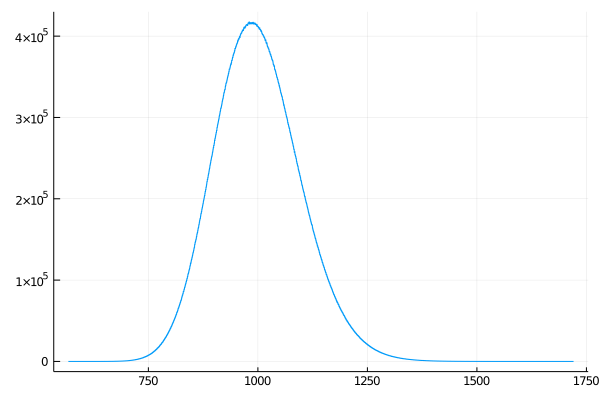

In [21]:
histogram(PV, label = false)

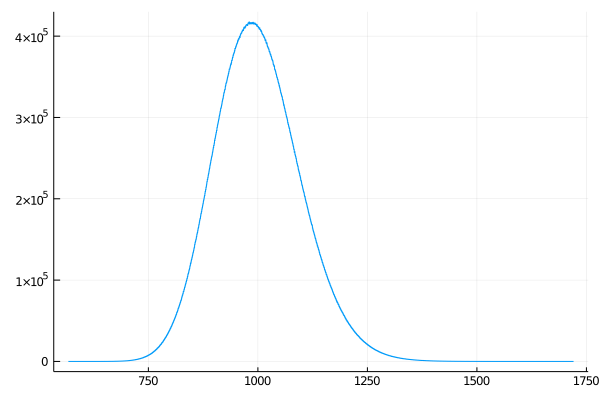

In [22]:
histogram(PV_alt, label = false)